# Adding Scale Bars and North Arrows to a Matplotlib Plot
Scale bars and north arrows are common elements added to maps to indicate the scale and orientation of the map, respectively. 

Two packages exist for easily adding these elements to the default `matplotlib` plots generated by GeoPandas' `plot()` function: [`matplotlib-scalebar`](https://pypi.org/project/matplotlib-scalebar/) and [`matplotlib-map-utils`](https://github.com/moss-xyz/matplotlib-map-utils). The use of each is described below.

## Using `matplotlib-scalebar`

In [2]:
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
from geodatasets import get_path

### Creating a ScaleBar object
The only required parameter for creating a ScaleBar object is `dx`. This is equal to a size of one pixel in real world. Value of this parameter depends on units of your CRS.

#### Projected coordinate system (meters)
The easiest way to add a scale bar is using a projected coordinate system with meters as units. Just set `dx = 1`:

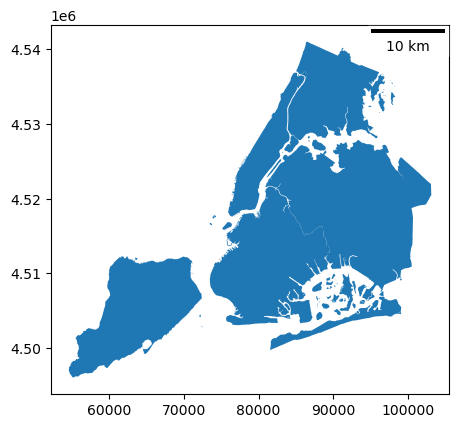

In [3]:
nybb = gpd.read_file(get_path("nybb"))
nybb = nybb.to_crs(32619)  # Convert the dataset to a coordinate
# system which uses meters

ax = nybb.plot()
ax.add_artist(ScaleBar(1))

#### Geographic coordinate system (degrees)
With a geographic coordinate system with degrees as units, `dx` should be equal to a distance in meters of two points with the same latitude (Y coordinate) which are one full degree of longitude (X) apart. You can calculate this distance by online calculator [(e.g. the Great Circle calculator)](http://edwilliams.org/gccalc.htm) or in geopandas.\
\
Firstly, we will create a GeoSeries with two points that have roughly the coordinates of NYC. They are located on the same latitude but one degree of longitude from each other. Their initial coordinates are specified in a geographic coordinate system (geographic WGS 84). They are then converted to a projected system for the calculation:

In [4]:
from shapely.geometry.point import Point

points = gpd.GeoSeries(
    [Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32619)  # Projected WGS 84 - meters

After the conversion, we can calculate the distance between the points. The result slightly differs from the Great Circle Calculator but the difference is insignificant (84,921 and 84,767 meters):

In [5]:
distance_meters = points[0].distance(points[1])

Finally, we are able to use geographic coordinate system in our plot. We set value of `dx` parameter to a distance we just calculated:

c:\Users\david\OneDrive\Programming\envs\personal\Lib\site-packages\matplotlib_scalebar\scalebar.py:457: UserWarning: Drawing scalebar on axes with unequal aspect ratio; either call ax.set_aspect(1) or suppress the warning with rotation='horizontal-only'.
  warnings.warn(


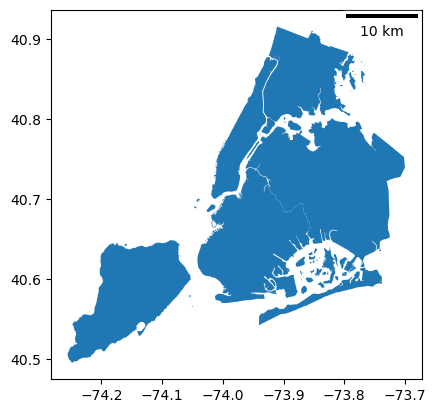

In [6]:
nybb = gpd.read_file(get_path("nybb"))
nybb = nybb.to_crs(4326)  # Using geographic WGS 84

ax = nybb.plot()
ax.add_artist(ScaleBar(distance_meters))

### Using other units 
The default unit for `dx` is m (meter). You can change this unit by the `units` and `dimension` parameters. There is a list of some possible `units` for various values of `dimension` below:

| dimension | units |
| -----     |:-----:|
| si-length | km, m, cm, um|
| imperial-length |in, ft, yd, mi|
|si-length-reciprocal|1/m, 1/cm|
|angle|deg|

In the following example, we will leave the dataset in its initial CRS which uses feet as units. The plot shows scale of 2 leagues (approximately 11 kilometers):

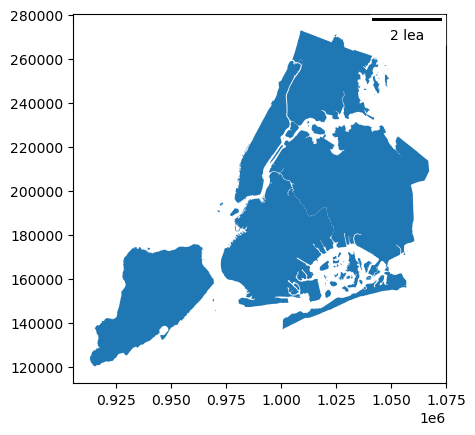

In [7]:
nybb = gpd.read_file(get_path("nybb"))

ax = nybb.plot()
ax.add_artist(ScaleBar(1, dimension="imperial-length", units="ft"))

### Customization of the scale bar

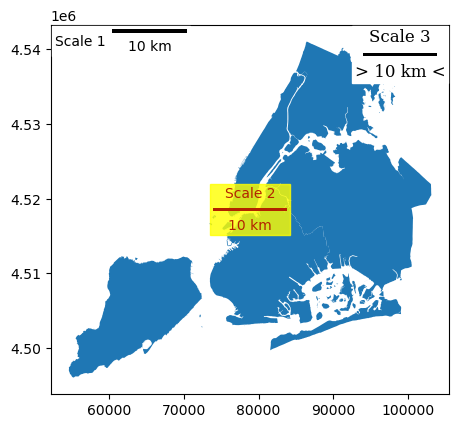

In [8]:
nybb = gpd.read_file(get_path("nybb")).to_crs(32619)
ax = nybb.plot()

# Position and layout
scale1 = ScaleBar(
    dx=1,
    label="Scale 1",
    location="upper left",  # in relation to the whole plot
    label_loc="left",
    scale_loc="bottom",  # in relation to the line
)

# Color
scale2 = ScaleBar(
    dx=1,
    label="Scale 2",
    location="center",
    color="#b32400",
    box_color="yellow",
    box_alpha=0.8,  # Slightly transparent box
)

# Font and text formatting
scale3 = ScaleBar(
    dx=1,
    label="Scale 3",
    font_properties={
        "family": "serif",
        "size": "large",
    },  # For more information, see the cell below
    scale_formatter=lambda value, unit: f"> {value} {unit} <",
)

ax.add_artist(scale1)
ax.add_artist(scale2)
ax.add_artist(scale3)

*Note:* Font is specified by six properties: `family`, `style`, `variant`, `stretch`, `weight`, `size` (and `math_fontfamily`). See [more](https://matplotlib.org/stable/api/font_manager_api.html#matplotlib.font_manager.FontProperties).\
\
For more information about matplotlib-scalebar library, see the [PyPI](https://pypi.org/project/matplotlib-scalebar/) or [GitHub](https://github.com/ppinard/matplotlib-scalebar) page.

## Using `matplotlib-map-utils`

Using this package, north arrows and scale bars can be made with either **functions** or **classes**; for the purposes of this tutorial, only the *functions* will be used, though the *classes* work in much the same way. Tutorials for customizing each object are available within the [`docs`](https://github.com/moss-xyz/matplotlib-map-utils/tree/main/matplotlib_map_utils/docs) directory of the repository.

In [9]:
import geopandas as gpd
from geodatasets import get_path
from matplotlib_map_utils.core.north_arrow import north_arrow, NorthArrow
from matplotlib_map_utils.core.scale_bar import scale_bar, ScaleBar

### Set-Up

In [10]:
nybb = gpd.read_file(get_path("nybb"))
# By default, the data is projected in feet
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

If you are working with a common plot size, both `NorthArrow` and `ScaleBar` have a function called `set_size()` that bulk-updates a variety of settings so that the relevant object looks "better" at that size.

GeoPandas' `plot()` function will create figures of `6.4"x4.8"` with the data used in this tutorial, which corresponds to a size of `small`.

In [11]:
NorthArrow.set_size("small")
ScaleBar.set_size("small")

### North Arrows

The `north_arrow()` function takes in the following arguments:

* `ax`: the axis on which to plot the north arrow

* `location`: a string indicating the location of the north arrow on the plot (see `loc` under [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) e.g., "upper left", "lower right", etc.)

* `scale`: the desired height of the north arrow, in *inches*

* `rotation`: a dictionary containing either a value for `degrees` (if rotation will be set manually), or arguments for `crs`, `reference`, and `coords` (if rotation will be calculated based on the provided CRS)

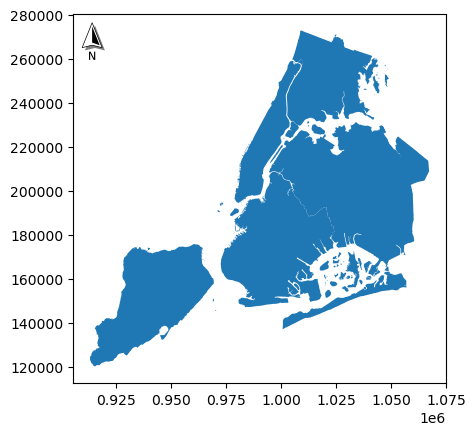

In [12]:
# Making a basic arrow using the minimum amount of arguments
ax = nybb.plot()
north_arrow(ax, location="upper left", rotation={"crs":nybb.crs, "reference":"center"})

Optional additional arguments can be passed to `base`, `fancy`, `shadow`, `label`, `pack`, and `aob` to change the styling of the arrow; see the documentation under [`docs\howto_north_arrow.ipynb`](https://github.com/moss-xyz/matplotlib-map-utils/blob/main/matplotlib_map_utils/docs/howto_north_arrow.ipynb) in the GitHub repo for details.

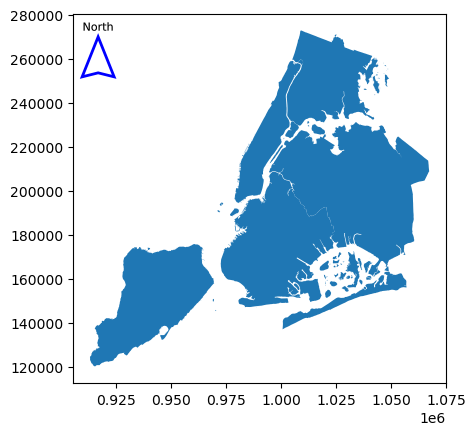

In [13]:
# Making a more customized arrow
ax = nybb.plot()
north_arrow(ax, location="upper left", scale=0.4, rotation={"crs":nybb.crs, "reference":"center"},
            base={"edgecolor":"blue","linewidth":2},
            fancy=False, shadow=False, # this turns off the component
            label={"position":"top", "text":"North", "fontsize":8})

### Scale Bars

The `scale_bar()` function takes in the following arguments:

* `ax`: the axis on which to plot the scale bar

* `location`: a string indicating the location of the scale bar on the plot (see `loc` under [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) e.g., "upper left", "lower right", etc.)

* `style`: the appearance of the arrow: can be either `ticks` or `boxes` (default)

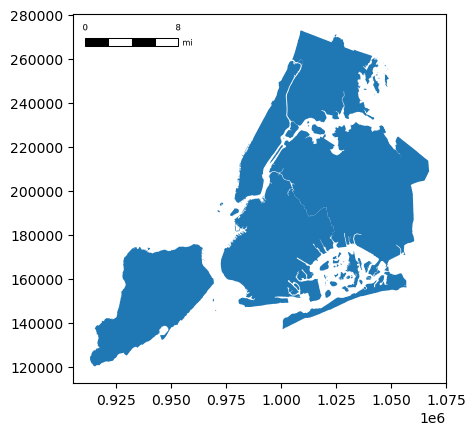

In [14]:
# Making a basic scale bar using the minimum amount of arguments
# Note that the data is auto-converted to miles
ax = nybb.plot()
scale_bar(ax, location="upper left", style="boxes", bar={"projection":nybb.crs})

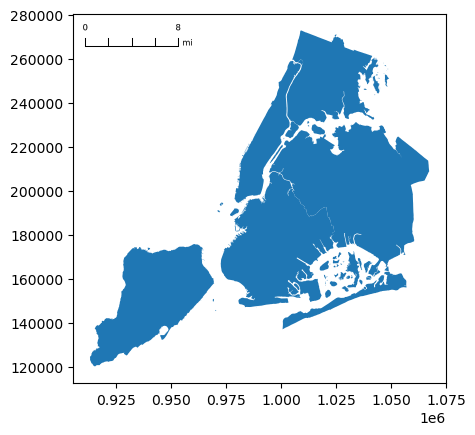

In [15]:
# Making the same scale bar but in the other style (ticks)
ax = nybb.plot()
scale_bar(ax, location="upper left", style="ticks", bar={"projection":nybb.crs})

The scale bar can handle converting between common unit types, as shown in the table below. 

| Unit Type      | Conversion Factor | Accepted Inputs                                        |
|----------------|-------------------|--------------------------------------------------------|
| Meters         | 1                 | `m`,`meter`,`metre`,`meters`,`meters`                  |
| Kilometers     | 1000              | `km`,`kilometer`,`kilometre`,`kilometers`,`kilometers` |
| Feet           | 0.3048            | `ft`,`ftUS`,`foot`,`feet`,`US survey foot`             |
| Yards          | 0.9144            | `yd`,`yard`,`yards`                                    |
| Miles          | 1609.34           | `mi`,`mile`,`miles`                                    |
| Nautical Miles | 1852              | `nmi`,`nautical`,`nautical mile`,`nautical miles`      |

The scale bar can also handle *unprojected* data (degrees) - it will convert it to metres using *great circle distance*, and then convert it into the units selected by the user. This will happen automatically when `projection` is set to a CRS of `4326` or similar.

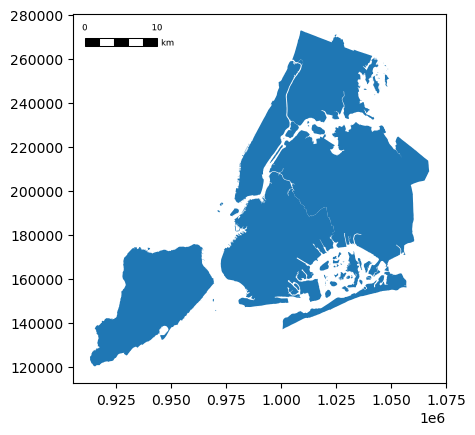

In [16]:
# Making a scale bar in kilometers instead, by changing bar["units"]
# Note that the data did not have to be reprojected to do this
ax = nybb.plot()
scale_bar(ax, location="upper left", style="boxes", bar={"projection":nybb.crs, "unit":"km"})

Optional additional arguments can be passed to `bar`, `labels`, `units`, `text`, and `aob` to change the styling of the bar; see the documentation under [`docs\howto_scale_bar.ipynb`](https://github.com/moss-xyz/matplotlib-map-utils/blob/main/matplotlib_map_utils/docs/howto_scale_bar.ipynb) in the GitHub repo for details.

*Note that control of the length of the bar, as well as the number of major and minor divisions, is handled within the `bar` style dictionary.*

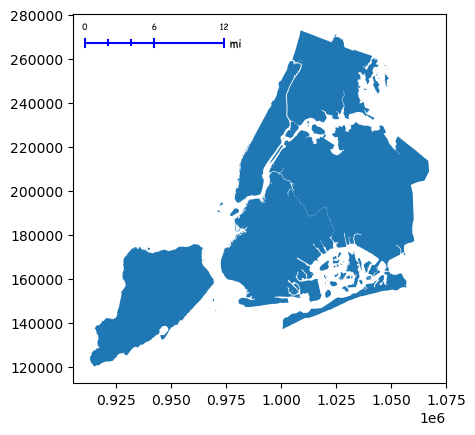

In [18]:
# Making a more formatted scale bar (ticks)
ax = nybb.plot()
scale_bar(ax, location="upper left", style="ticks", 
          bar={"projection":nybb.crs, "max":12, "major_div":2, "minor_div":3, "minor_type":"first",
               "tick_loc":"middle", "tickcolors":"blue", "basecolors":"blue", "tickwidth":1.5},
          labels={"loc":"above", "style":"major"}, 
          units={"loc":"bar", "fontsize":8}, text={"fontfamily":"cursive"})